In [688]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from sklearn.metrics import r2_score

In [689]:
image_dir = Path('./images500-20221123T124124Z-001/images500')

In [690]:
image_dir

Path('images500-20221123T124124Z-001/images500')

In [691]:
filepath = pd.Series(list(image_dir.glob(r'**/*')), name = 'Filepath').astype(str)

In [692]:
filepath[0]

'images500-20221123T124124Z-001\\images500\\id_0002ea6f15c7fa6f4c221783.jpg'

In [693]:
os.path.split(filepath.values[0])[1]

'id_0002ea6f15c7fa6f4c221783.jpg'

In [694]:
image = pd.Series(filepath.apply(lambda x :os.path.split(os.path.split(x)[1])[1]), name = 'image_id_worm')

In [695]:
images = pd.concat([filepath, image],axis = 1).sample(frac = 1.0,random_state = 42).reset_index(drop = True)

In [696]:
images.sample(5)

,Filepath,image_id_worm
6152,images500-20221123T124124Z-001\images500\id_aeb7c21a5ef7a004d4b61989.jpg,id_aeb7c21a5ef7a004d4b61989.jpg
10466,images500-20221123T124124Z-001\images500\id_baafd7221bf63341b295c331.jpg,id_baafd7221bf63341b295c331.jpg
1340,images500-20221123T124124Z-001\images500\id_1ae8e29c9b6777a0cbc85aa7.jpg,id_1ae8e29c9b6777a0cbc85aa7.jpg
10234,images500-20221123T124124Z-001\images500\id_e4e81136162ebda848818dcc.jpg,id_e4e81136162ebda848818dcc.jpg
11426,images500-20221123T124124Z-001\images500\id_6e32626dc37f979887594557.jpg,id_6e32626dc37f979887594557.jpg


In [697]:
images.shape

(12540, 2)

In [698]:
import random

In [699]:
x = plt.imread(filepath[1])

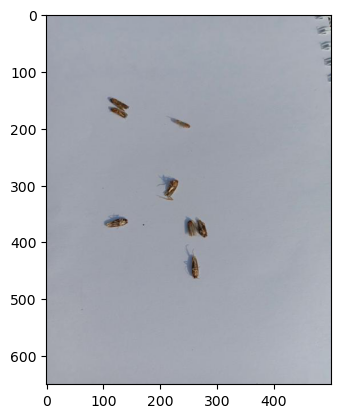

In [700]:
plt.imshow(x)

In [701]:
train = pd.read_csv('Train.csv')

In [702]:
train = train.fillna(0)

In [703]:
train.head()

,image_id_worm,worm_type,number_of_worms
0,id_0002ea6f15c7fa6f4c221783.jpg,pbw,51
1,id_0005ef295aafe6acc63587db.jpg,pbw,8
2,id_00084298dd030a500033ff78.jpg,0,0
3,id_00093f2c76f6488737325859.jpg,pbw,12
4,id_000b2e6c437c643f25d4a6c3.jpg,pbw,87


In [704]:
train[train['image_id_worm'] == 'id_0a874b32c61041f70b309f6e.jpg']

,image_id_worm,worm_type,number_of_worms
412,id_0a874b32c61041f70b309f6e.jpg,0,0


In [705]:
train.describe()

,number_of_worms
count,9900.000000
mean,13.835859
std,35.314402
min,0.000000
25%,0.000000
50%,3.000000
75%,10.000000
max,527.000000


In [706]:
train.shape

(9900, 3)

In [707]:
train.isna().sum()

image_id_worm      0
worm_type          0
number_of_worms    0
dtype: int64

In [708]:
train_pivot = train.pivot_table(values = 'number_of_worms', index = 'image_id_worm', columns = 'worm_type').reset_index()

In [709]:
train_pivot.head()

worm_type,image_id_worm,0,abw,pbw
0,id_0002ea6f15c7fa6f4c221783.jpg,NaN,NaN,51.0
1,id_0005ef295aafe6acc63587db.jpg,NaN,NaN,8.0
2,id_00084298dd030a500033ff78.jpg,0.0,NaN,NaN
3,id_00093f2c76f6488737325859.jpg,NaN,NaN,12.0
4,id_000b2e6c437c643f25d4a6c3.jpg,NaN,NaN,87.0


In [710]:
train_pivot = train_pivot.drop(0, axis = 1)

In [711]:
train_pivot.shape

(9737, 3)

In [712]:
testdata = images[~images['image_id_worm'].isin(train_pivot['image_id_worm'])]

In [714]:
testdata.head()

,Filepath,image_id_worm
2,images500-20221123T124124Z-001\images500\id_7fd9ccb8d3b480825e5d6fe4.jpg,id_7fd9ccb8d3b480825e5d6fe4.jpg
5,images500-20221123T124124Z-001\images500\id_0883bbe2ed47e82b16bca7aa.jpg,id_0883bbe2ed47e82b16bca7aa.jpg
6,images500-20221123T124124Z-001\images500\id_3fb316b0bc92f9b64e150c61.jpg,id_3fb316b0bc92f9b64e150c61.jpg
12,images500-20221123T124124Z-001\images500\id_43fe6a2c9d27d56e1ce12e35.jpg,id_43fe6a2c9d27d56e1ce12e35.jpg
17,images500-20221123T124124Z-001\images500\id_62b9746c1d2daf1613ca7cb9.jpg,id_62b9746c1d2daf1613ca7cb9.jpg


In [716]:
images = images[images['image_id_worm'].isin(train_pivot['image_id_worm'])]

In [717]:
image_df = images.merge(train_pivot, on = 'image_id_worm')

In [718]:
image_df.isna().sum()

Filepath            0
image_id_worm       0
abw              8042
pbw              4790
dtype: int64

In [719]:
image_df = image_df.fillna(0)

In [720]:
image_df.head(50)

,Filepath,image_id_worm,abw,pbw
0,images500-20221123T124124Z-001\images500\id_c19995f5ada0099b71d76cd2.jpg,id_c19995f5ada0099b71d76cd2.jpg,0.0,0.0
1,images500-20221123T124124Z-001\images500\id_3c4ebbfe1adc8bd2db189c97.jpg,id_3c4ebbfe1adc8bd2db189c97.jpg,0.0,0.0
2,images500-20221123T124124Z-001\images500\id_ca57a7cbcfff8a446932ed24.jpg,id_ca57a7cbcfff8a446932ed24.jpg,2.0,0.0
3,images500-20221123T124124Z-001\images500\id_95deaa280c28018dfa51f41c.jpg,id_95deaa280c28018dfa51f41c.jpg,0.0,51.0
4,images500-20221123T124124Z-001\images500\id_2e2b0def2c3333ff0a7b7fcd.jpg,id_2e2b0def2c3333ff0a7b7fcd.jpg,0.0,0.0
5,images500-20221123T124124Z-001\images500\id_ddd43c362c560d5b3cd18f7b.jpg,id_ddd43c362c560d5b3cd18f7b.jpg,0.0,0.0
6,images500-20221123T124124Z-001\images500\id_53cc6011ac07c1253684d3d5.jpg,id_53cc6011ac07c1253684d3d5.jpg,1.0,2.0
7,images500-20221123T124124Z-001\images500\id_caa1f3f04a7d8ef6424ad0b6.jpg,id_caa1f3f04a7d8ef6424ad0b6.jpg,0.0,14.0
8,images500-20221123T124124Z-001\images500\id_77d2f9116c3995bd4f0a0c4a.jpg,id_77d2f9116c3995bd4f0a0c4a.jpg,0.0,0.0
9,images500-20221123T124124Z-001\images500\id_1b967f0264e819e3dfde5345.jpg,id_1b967f0264e819e3dfde5345.jpg,13.0,0.0


In [722]:
image_df = image_df.drop('image_id_worm', axis = 1)

In [723]:
image_df.head()

,Filepath,abw,pbw
0,images500-20221123T124124Z-001\images500\id_c19995f5ada0099b71d76cd2.jpg,0.0,0.0
1,images500-20221123T124124Z-001\images500\id_3c4ebbfe1adc8bd2db189c97.jpg,0.0,0.0
2,images500-20221123T124124Z-001\images500\id_ca57a7cbcfff8a446932ed24.jpg,2.0,0.0
3,images500-20221123T124124Z-001\images500\id_95deaa280c28018dfa51f41c.jpg,0.0,51.0
4,images500-20221123T124124Z-001\images500\id_2e2b0def2c3333ff0a7b7fcd.jpg,0.0,0.0


In [724]:
image_df[['abw','pbw']] = image_df[['abw','pbw']].astype(int)

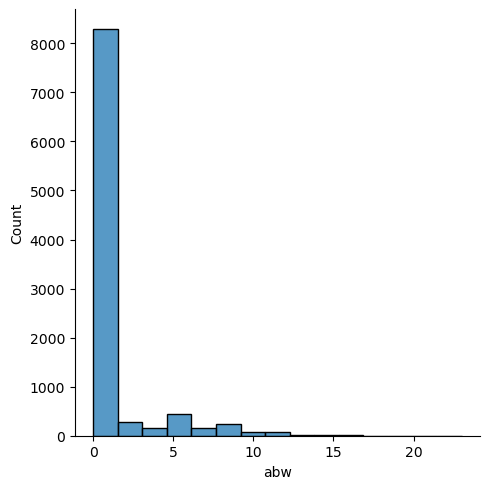

In [725]:
sns.displot(image_df['abw'], kde=False);

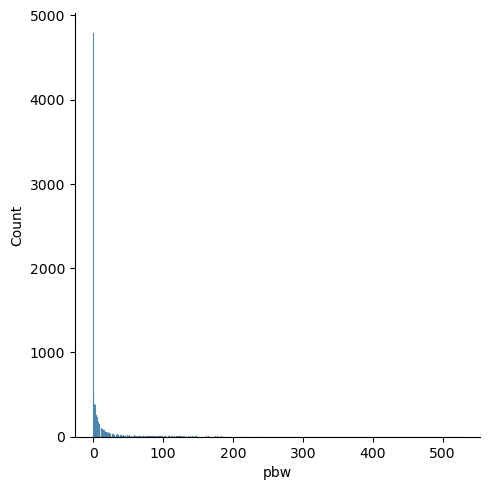

In [726]:
sns.displot(image_df['pbw'], kde=False);

In [730]:
train_df, test_df = train_test_split(image_df, test_size = 0.1, shuffle = True,random_state = 42)

In [731]:
print(train_df.shape)
print(test_df.shape)

(8763, 3)
(974, 3)


In [732]:
import os
import PIL

In [733]:
train_df.head()

,Filepath,abw,pbw
6972,images500-20221123T124124Z-001\images500\id_55f50c5e115cbb3badb3bc04.jpg,0,0
2754,images500-20221123T124124Z-001\images500\id_10a950db2e9021abee34d177.jpg,0,4
381,images500-20221123T124124Z-001\images500\id_1b0a82c6e7ec896e737043b8.jpg,0,104
9063,images500-20221123T124124Z-001\images500\id_93c0e34fff61bfc8243be80c.jpg,4,0
1147,images500-20221123T124124Z-001\images500\id_d7d443bdd9667dc0829de9b9.jpg,9,0


In [734]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(plt.imread(train_df['Filepath'][i]))
plt.show()

In [735]:
train_df.describe()

,abw,pbw
count,8763.000000,8763.000000
mean,0.961086,13.307429
std,2.495001,36.449231
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,9.000000
max,23.000000,527.000000


In [736]:
width,height = 1000,1000

In [737]:
for t in image_df['Filepath']:
    img = PIL.Image.open(t)
    w, h = img.size
    if w < width:
        width = w
    if h < height:
        height = h

IMG_WIDTH = width
IMG_HEIGHT = height
IMG_CHANNELS = 3

In [738]:
IMG_WIDTH

In [739]:
IMG_HEIGHT

In [740]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range = 90,
    vertical_flip = True, 
    validation_split=0.2,
    horizontal_flip=True, 
    fill_mode="nearest"
)

In [741]:
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    
)

In [742]:
train_df.head()

,Filepath,abw,pbw
6972,images500-20221123T124124Z-001\images500\id_55f50c5e115cbb3badb3bc04.jpg,0,0
2754,images500-20221123T124124Z-001\images500\id_10a950db2e9021abee34d177.jpg,0,4
381,images500-20221123T124124Z-001\images500\id_1b0a82c6e7ec896e737043b8.jpg,0,104
9063,images500-20221123T124124Z-001\images500\id_93c0e34fff61bfc8243be80c.jpg,4,0
1147,images500-20221123T124124Z-001\images500\id_d7d443bdd9667dc0829de9b9.jpg,9,0


In [744]:
train_df.describe()

,abw,pbw
count,8763.000000,8763.000000
mean,0.961086,13.307429
std,2.495001,36.449231
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,9.000000
max,23.000000,527.000000


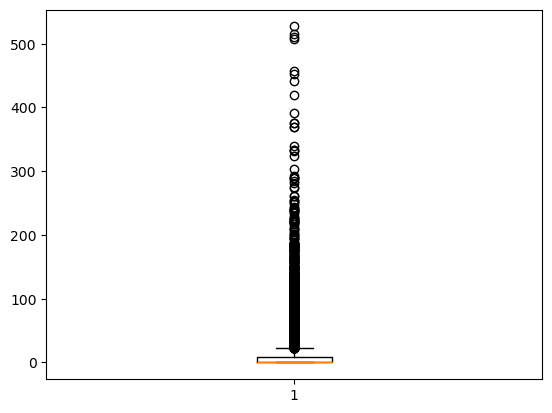

In [745]:
plt.boxplot(train_df['pbw']);

In [746]:
train_images = train_gen.flow_from_dataframe(
dataframe = train_df,
x_col = 'Filepath',
y_col = ['abw','pbw'],
target = (256,256),
color_mode = 'rgb',
class_mode = 'raw',
batch_size = 16, 
shuffle = True,
seed = 42,
subset = 'training'
)

Found 7011 validated image filenames.


In [747]:
val_images = train_gen.flow_from_dataframe(
dataframe = train_df,
x_col = 'Filepath',
y_col = ['abw','pbw'],
target = (256,256),
color_mode = 'rgb',
class_mode = 'raw',
batch_size = 16, 
shuffle = True,
seed = 42,
subset = 'validation'
)

Found 1752 validated image filenames.


In [748]:
test_images = test_gen.flow_from_dataframe(
dataframe = test_df,
x_col = 'Filepath',
y_col = ['abw','pbw'],
target = (256,256),
color_mode = 'rgb',
class_mode = 'raw',
batch_size = 16, 
shuffle = False
)

Found 974 validated image filenames.


In [659]:
def visualize_aug(image_gen,df):
    series = df.iloc[2]
    df_aug_visualize = pd.concat([series,series], axis = 1).transpose()
    iter_viz = image_gen.flow_from_dataframe(
    dataframe = df_aug_visualize,
    x_col = 'Filepath',
    y_col = ['abw','pbw'],
    class_mode = 'raw',
    target_size = (256,256),
    batch_size = 2)
    
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        batch = next(iter_viz)
        img = batch[0]
        img = img[1,:,:,:]
        plt.imshow(img)
        
    plt.show()
    plt.close()

Found 2 validated image filenames.


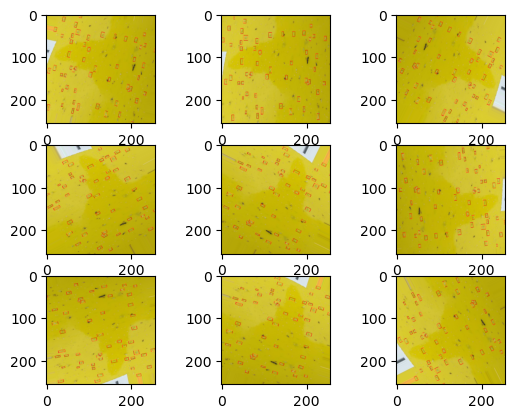

In [660]:
visualize_aug(train_gen,train_df)

In [661]:
Inputs = tf.keras.Input((256,256,3))
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu')(Inputs)

In [662]:
x

<KerasTensor: shape=(None, 254, 254, 32) dtype=float32 (created by layer 'conv2d_1')>

In [663]:
x=tf.keras.layers.BatchNormalization()(x)

In [664]:
x=tf.keras.layers.MaxPool2D(2,2)(x)

In [665]:
x = tf.keras.layers.Dropout(0.2)(x)

In [666]:
x

<KerasTensor: shape=(None, 127, 127, 32) dtype=float32 (created by layer 'dropout')>

In [667]:
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu')(x)

In [668]:
x=tf.keras.layers.BatchNormalization()(x)

In [669]:
x = tf.keras.layers.MaxPool2D(2,2)(x)

In [670]:
x

<KerasTensor: shape=(None, 62, 62, 64) dtype=float32 (created by layer 'max_pooling2d_1')>

In [671]:
x = tf.keras.layers.Dropout(0.2)(x)

In [672]:
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu')(x)

In [673]:
x=tf.keras.layers.BatchNormalization()(x)

In [674]:
x = tf.keras.layers.MaxPool2D()(x)

In [675]:
x =tf.keras.layers.Dropout(0.2)(x)

In [676]:
x = tf.keras.layers.Flatten()(x)

In [677]:
x

<KerasTensor: shape=(None, 57600) dtype=float32 (created by layer 'flatten')>

In [678]:
#x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [679]:
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
x = tf.keras.layers.Dense(16, activation = 'relu')(x)

In [680]:
x

<KerasTensor: shape=(None, 16) dtype=float32 (created by layer 'dense_1')>

In [681]:
output = tf.keras.layers.Dense(2, activation = 'linear')(x)

In [682]:
output

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_2')>

In [683]:
model = tf.keras.Model(inputs = Inputs, outputs = output)

In [684]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      18496 

In [685]:
from keras.optimizers import Adam

In [686]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanSquaredError(),
             metrics = [tf.keras.metrics.MeanAbsoluteError()])

In [687]:
history = model.fit(train_images, validation_data = val_images, epochs = 2)
                   

# history = model.fit(train_images, validation_data = val_images, epochs = 3,
#                     callbacks = [
#                         tf.keras.callbacks.EarlyStopping(
#                         monitor = 'val_loss',
#                         patience = 3,
#                         restore_best_weights = True)
#                     ]
#                    )

Epoch 1/2
424/424 [==============================] - 1342s 3s/step - loss: 118.1233 - mean_absolute_error: 5.1810 - val_loss: 148.7066 - val_mean_absolute_error: 5.8403
Epoch 2/2
 69/424 [===>..........................] - ETA: 20:56 - loss: 103.8535 - mean_absolute_error: 4.3178

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\DELL\AppData\Local\Temp\ipykernel_20504\4226747450.py", line 1, in <module>
    history = model.fit(train_images, validation_data = val_images, epochs = 2)
  File "C:\Users\DELL\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
    tmp_logs = self.train_function(iterator)
  File "C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py", line 915, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\DELL\anaconda3\lib\site-pack

TypeError: object of type 'NoneType' has no len()

In [61]:
# using a pretrained model

initial_model = tf.keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(256,256,3))

In [62]:
for layer in initial_model.layers[:]:
    layer.trainable = False

In [63]:
last = initial_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(last)
x = tf.keras.layers.Dense(128)(x)
#x = tf.keras.layers.Dense(64,activation='relu')(x) 
#x = tf.keras.layers.LeakyReLU(alpha=.1)(x)
preds =tf.keras.layers.Dense(2, activation='linear')(x)
model = tf.keras.Model(initial_model.input, preds)

In [ ]:
history = model.fit(train_images, validation_data = val_images, epochs = 2)
                   

# history = model.fit(train_images, validation_data = val_images, epochs = 3,
#                     callbacks = [
#                         tf.keras.callbacks.EarlyStopping(
#                         monitor = 'val_loss',
#                         patience = 3,
#                         restore_best_weights = True)
#                     ]
#                    )

In [334]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [ ]:
# optim = keras.optimizers.SGD(lr=1e-5, momentum=0.2)
# model.compile(loss='mean_squared_error', optimizer=optim)
# model.fit(trainX, trainY, epochs=8, verbose=2)

In [458]:
train_df.dtypes

Filepath     object
abw         float64
pbw         float64
dtype: object

In [67]:
model.save("model256.h5")

In [177]:
predicted_ages = np.squeeze(model.predict(test_images))
true_ages = test_images.labels

41/41 [==============================] - 18s 423ms/step


In [65]:
rmse = np.sqrt(model.evaluate(test_images, verbose=0))
mae= np.abs(model.evaluate(test_images, verbose=0))

In [66]:
mae

array([0.52132416, 0.50089252])

In [67]:
rmse

array([0.72202781, 0.70773761])

In [178]:
r2 = r2_score(true_ages, predicted_ages)
print("Test R^2 Score: {:.5f}".format(r2))

Test R^2 Score: 0.07018


In [69]:
null_rmse = np.sqrt(np.sum((true_ages - np.mean(true_ages))**2) / len(true_ages))
print("Null/Baseline Model Test RMSE: {:.5f}".format(null_rmse))

Null/Baseline Model Test RMSE: 1.99584


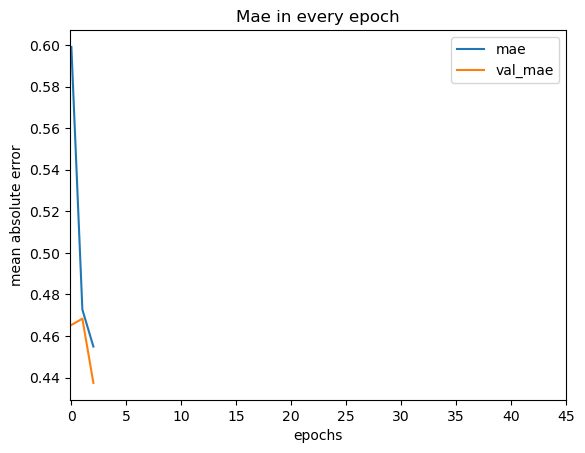

In [70]:
# plot mae
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['mae', 'val_mae'])
# plt.ylim(1, 4)
# plt.xlim(0, 50)

plt.xticks(np.arange(0,50, 5))

plt.xlabel('epochs')
plt.ylabel('mean absolute error')
plt.title('Mae in every epoch') 
plt.show()



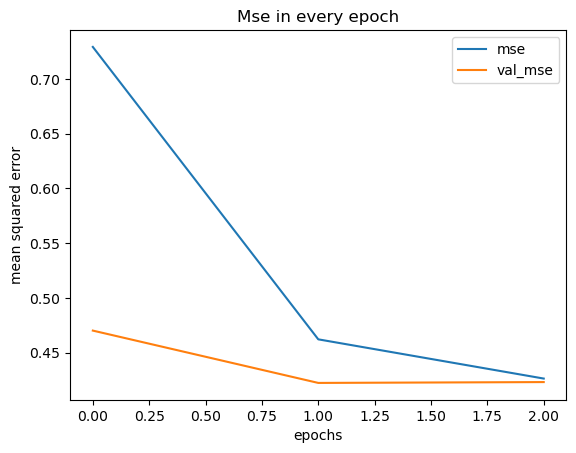

In [71]:
# plot mae
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.legend(['mse', 'val_mse'])
# plt.ylim(1, 4)
# plt.xlim(0, 50)

#plt.xticks(np.arange(0,50, 5))

plt.xlabel('epochs')
plt.ylabel('mean squared error')
plt.title('Mse in every epoch')
plt.show()